# Chapter 06. 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [124]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X    # 언패킹 (x_set : 확률변수가 취할 수 있는 값 집합, f : )
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X    # 언패킹
    mean = E(X, g)  # 기대값 저장
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.round(np.sum(prob), 6))
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    # ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='k')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 6.1 베르누이 분포

In [125]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [126]:
# Bern(0.3) 을 따르는 확률변수 X 생성
p = 0.3
X = Bern(p)

In [127]:
check_prob(X)

expected value 0.3
variance 0.21


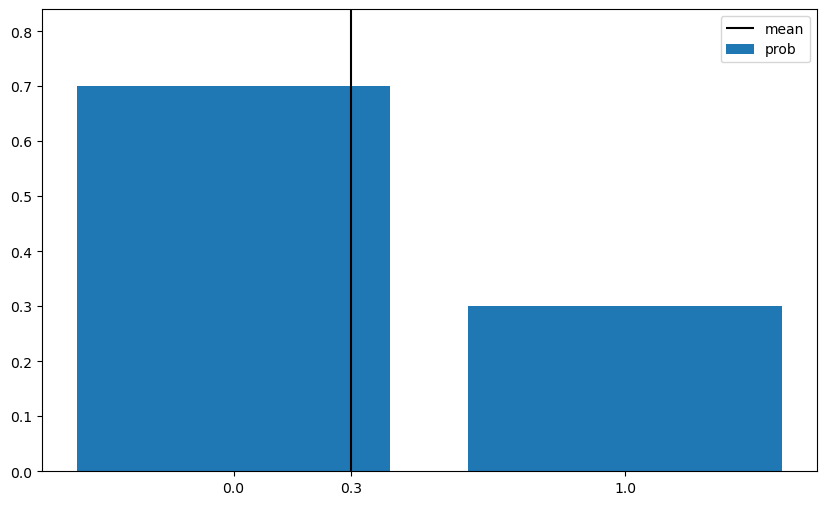

In [128]:
plot_prob(X)